# Avacado Project

### Problem Statement:

Avocado is a fruit consumed by people heavily in the United States. 
Content

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

    Date - The date of the observation
    AveragePrice - the average price of a single avocado
    type - conventional or organic
    year - the year
    Region - the city or region of the observation
    Total Volume - Total number of avocados sold
    4046 - Total number of avocados with PLU 4046 sold
    4225 - Total number of avocados with PLU 4225 sold
    4770 - Total number of avocados with PLU 4770 sold
    
Task is to make a mode that can consider the data provided and predict the Average Price.

In [76]:
#Imported the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [77]:
#Loaded the data

df=pd.read_csv("avocado.csv")

#### Exploratory Data Analysis:

In [78]:
df = df.drop('Unnamed: 0', axis=1)
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Dropped the 'Unnamed: 0' column because it was just index.

In [79]:
# Checking the shape of the dataset

df.shape

(18249, 13)

- The dataset content contains 18249 rows and 13 columns.
- The target column is 'AveragePrice'.

In [80]:
# Checking for the columns

df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [81]:
# Displlaying the columns '4046', '4225', and '4770' to 'PLU_4046', 'PLU_4225', and 'PLU_4770' respectively.

df = df.rename(columns={'4046':'PLU_4046', '4225':'PLU_4225', '4770':'PLU_4770'})
df.head()

,Date,AveragePrice,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [82]:
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
PLU_4046        float64
PLU_4225        float64
PLU_4770        float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

9 Columns are continous data (Float), 1 column data is integer data type amd 3 are object datatypes

In [83]:
# Checking for the missing values in the dataset

df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
PLU_4046        0
PLU_4225        0
PLU_4770        0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

There are no missing values in the dataset.

In [84]:
# Checked the Non-Null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   PLU_4046      18249 non-null  float64
 4   PLU_4225      18249 non-null  float64
 5   PLU_4770      18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


1. There are no null values in the dataset.
2. Data type of target variable 'AveragePrice' is float datatype.

Performing feature engineering on the date column to get the day and month.

We're not extracting the year since it is already there in the dataset.

In [85]:
df['Date']= pd.to_datetime(df['Date'])
df['Month']= df['Date'].dt.month
df['Day']=df['Date'].dt.day

In [86]:
df.head()

,Date,AveragePrice,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


We can see that two new columns added additionally to the dataset.

In [87]:
# Dropping 'Date' column from the dataset since it has been splitted to year, month and day already

df = df.drop(['Date'], axis = 1)
df.head()

,AveragePrice,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


In [88]:
# Checking the Average price of the avacado year basis

df.groupby('year')['AveragePrice'].mean()

year
2015    1.375590
2016    1.338640
2017    1.515128
2018    1.347531
Name: AveragePrice, dtype: float64

Average price of the avacado was highest in the year 2017 and lowest in the year 2016.

#### Analyzing the independent and dependent Variables

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

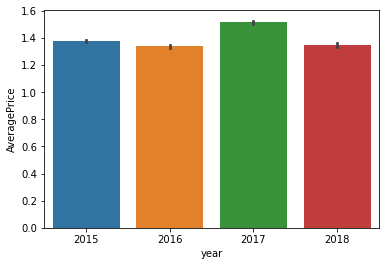

In [89]:
# Plotting bar graph to show the distribution of year-wise average price

sns.barplot(x='year',y='AveragePrice', data=df)

In the year 2017, price of the Avacado was high followed by 2015. 2016 was the lowest price year

<AxesSubplot:xlabel='Month', ylabel='AveragePrice'>

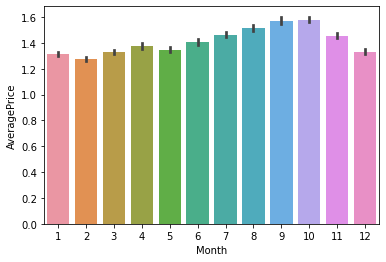

In [90]:
# Plotting graph to show the Average price distribution month wise.

sns.barplot(x='Month',y='AveragePrice', data=df)

Maximum Prices were highest during 9th and 10th month due to high demand in the month of 9th and 10th.
Avocado demand exist almost always

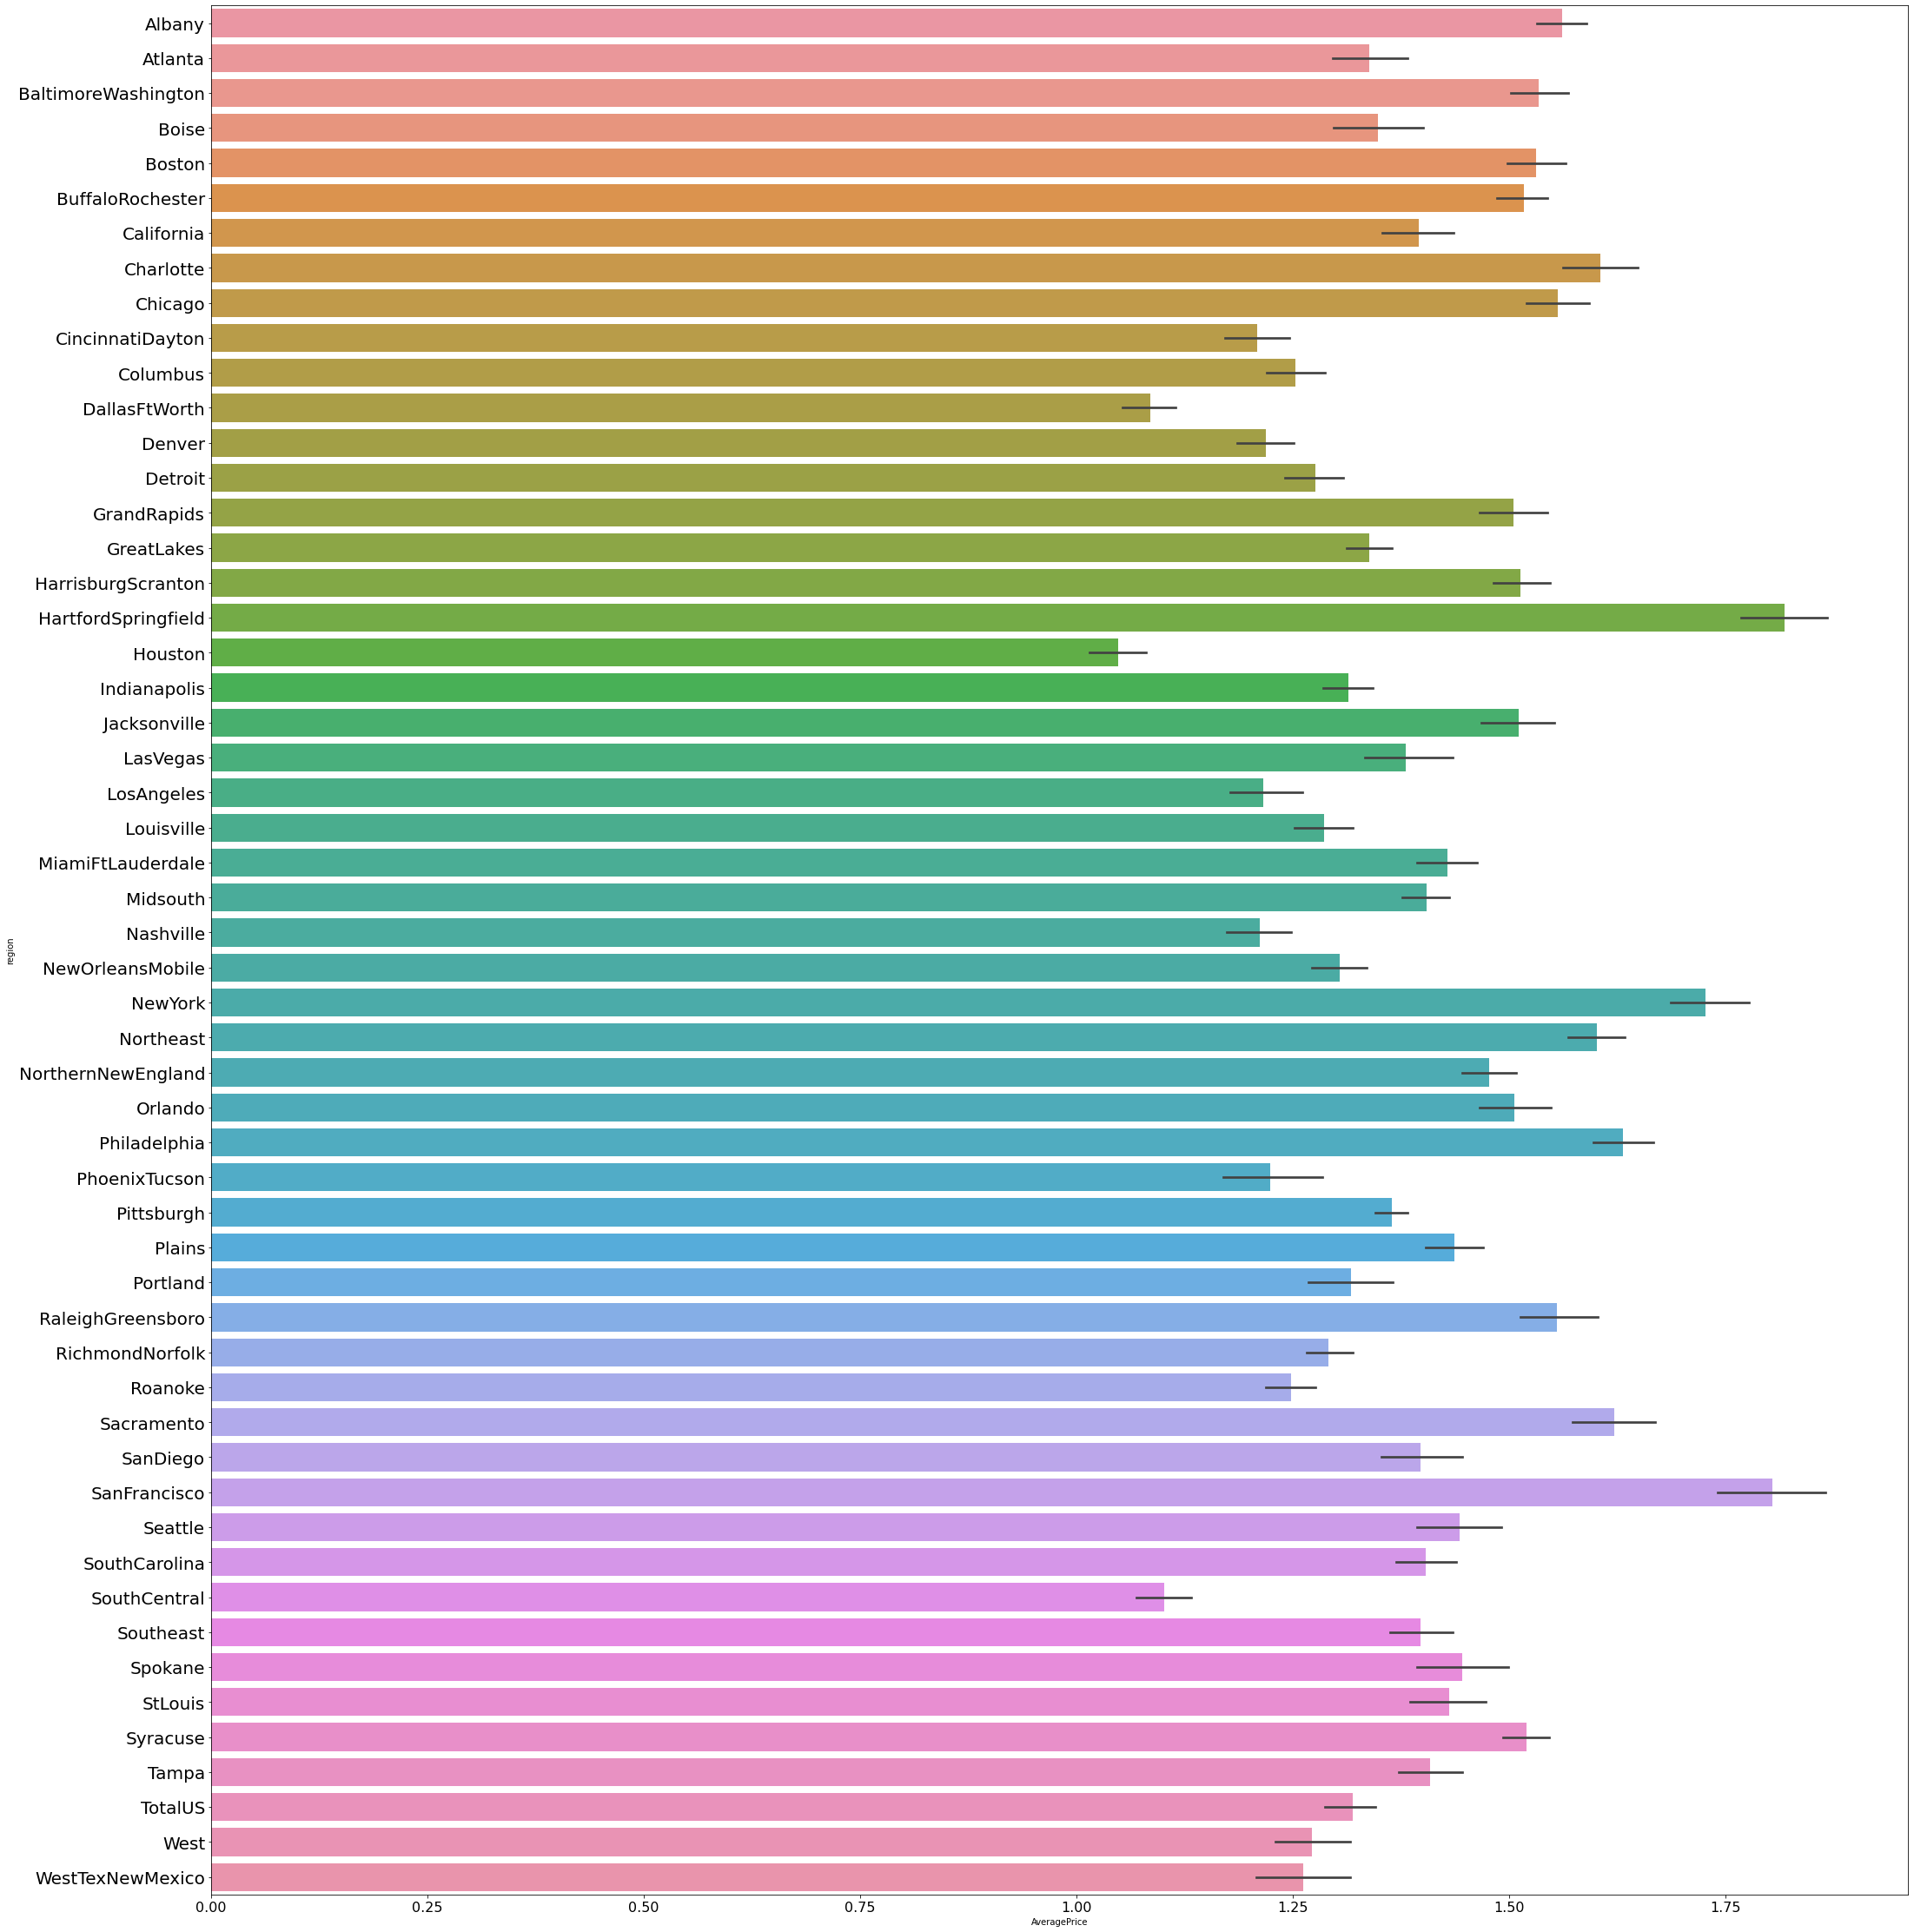

In [91]:
# Plotting graph to show Average Price distribution region wise.

plt.figure(figsize=[35,40])
sns.barplot(x='AveragePrice', y='region', data = df, orient='h')
plt.xticks(fontsize=16)
plt.yticks(fontsize=20)
plt.show()

Above Graph shows that the average price of Avocado was highest in the region 'Hartford–Springfield' and lowest in the region 'Houston'.

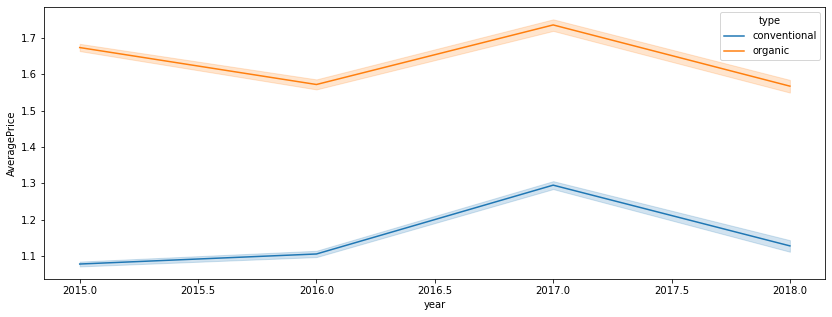

In [92]:
# Plotting graph to show the type-wise average price distribution of Avocado

plt.figure(figsize=[14,5])
sns.lineplot(x='year',y='AveragePrice', hue='type', data=df)
plt.show()

Organic avocado has higher price than conventional always

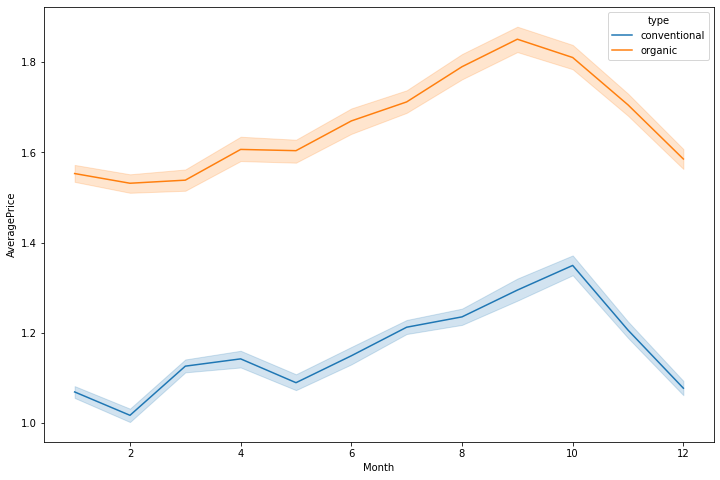

In [93]:
# Plotting graph to show the type-wise average price distribution of Avocado

plt.figure(figsize=[12,8])
sns.lineplot(x='Month',y='AveragePrice', hue='type', data=df)
plt.show()

There is a continuous increase in the average price of Avocado from the month of May for both types.

For organic avacado, peak value of the average price is attained in 9th month and for the conventional type, peak value of the average price is attained in 10th month.

The average price is continuously increasing after 5th month  and till 10th month for the conventional Avocados

The average price is continuously increasing after 5th month and till 9th month for the organic Avocados.

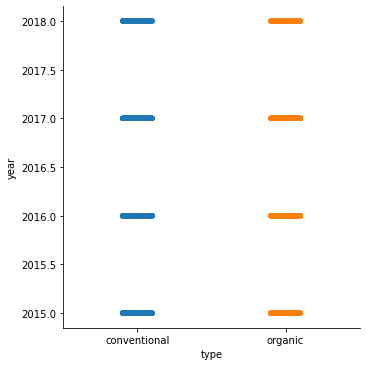

In [94]:
sns.catplot(x="type", y="year",data=df)

We can observe that there are almost equal sales for both types of avacados during 2015 and 2018.

In [95]:
# Analyzing the Statistical information for the dataset

df.describe()

,AveragePrice,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899,6.177215,15.662612
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,3.534130,8.776281
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,1.000000,1.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,3.000000,8.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,6.000000,16.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000,9.000000,23.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,12.000000,31.000000


<AxesSubplot:>

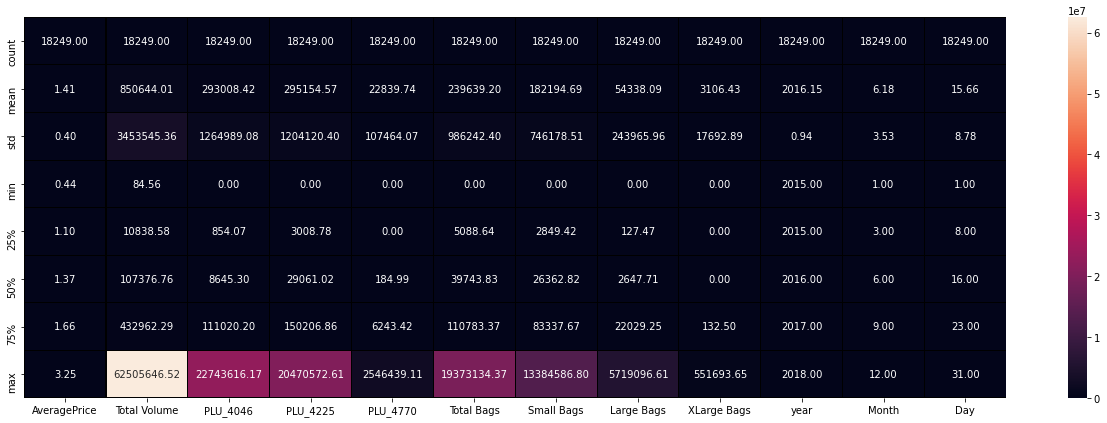

In [96]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

### Correlation Checking

In [97]:
df.corr()

,AveragePrice,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197,0.162409,0.027386
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193,-0.024689,-0.009747
PLU_4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353,-0.025803,-0.010159
PLU_4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559,-0.022108,-0.012393
PLU_4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531,-0.033424,-0.009009
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552,-0.022724,-0.004988
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915,-0.023126,-0.003870
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891,-0.020187,-0.008352
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033,-0.012969,0.000319
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000,-0.177050,0.004475


<AxesSubplot:>

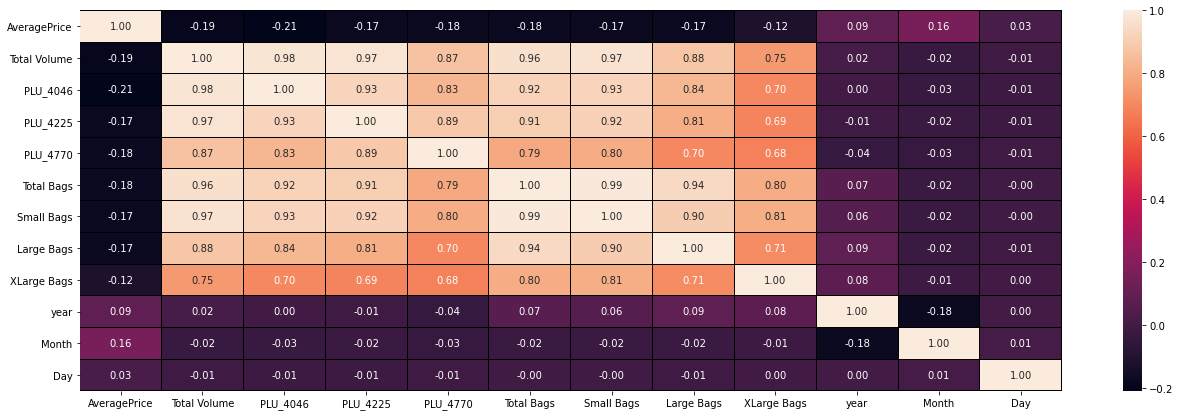

In [98]:
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

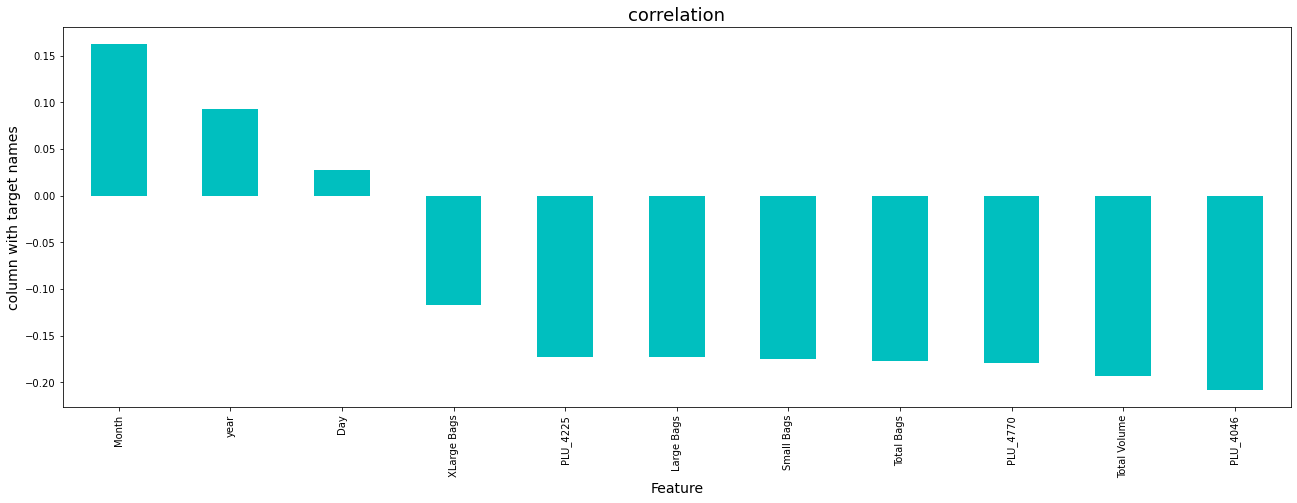

In [99]:
plt.figure(figsize=(22,7))
df.corr()['AveragePrice'].sort_values(ascending=False).drop(['AveragePrice']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

In [100]:
corr_matrix = df.corr()
corr_matrix['AveragePrice'].sort_values(ascending = False)

AveragePrice    1.000000
Month           0.162409
year            0.093197
Day             0.027386
XLarge Bags    -0.117592
PLU_4225       -0.172928
Large Bags     -0.172940
Small Bags     -0.174730
Total Bags     -0.177088
PLU_4770       -0.179446
Total Volume   -0.192752
PLU_4046       -0.208317
Name: AveragePrice, dtype: float64

From the Heatmap, Correlation Matrix we can observe following information

1. Month has highest correlation positively followed by Year

2. PLU_4046, Total Volume, PLU_4770 has highest negative correlation

3. Day is the least correlated data column for the target variable

#### Encoding using Label Encoder:

In [101]:
# LabelEncoder for 'type' column

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['type'].drop_duplicates())
le.classes_
df['type'] = le.transform(df['type'])

In [102]:
# LabelEncoder for 'region' column

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df['region'])
le.classes_
df['region'] = le.transform(df['region'])

In [103]:
# Checking the head of the dataset

df.head()

,AveragePrice,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,11,29


In [104]:
#Checking the data types of the columns again

df.dtypes

AveragePrice    float64
Total Volume    float64
PLU_4046        float64
PLU_4225        float64
PLU_4770        float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type              int32
year              int64
region            int32
Month             int64
Day               int64
dtype: object

Categorical Data is encoded to continous data

### Outlier Analysis and Removal

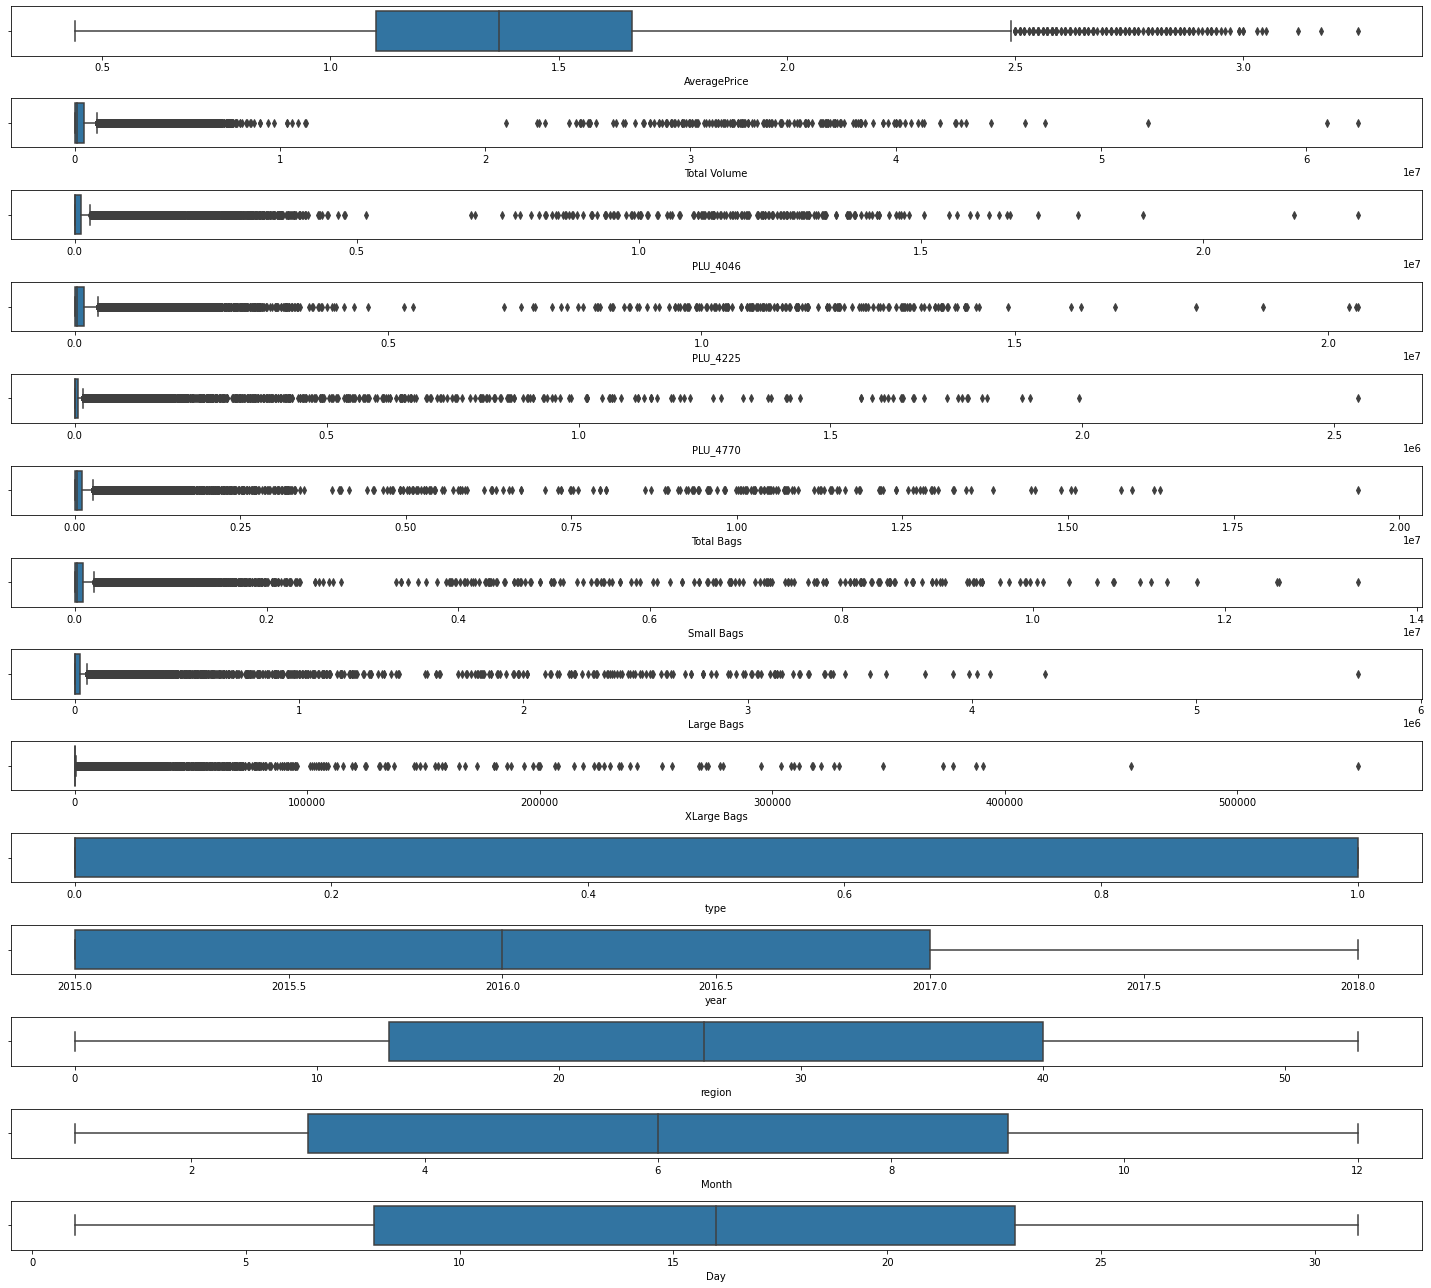

In [105]:
fig, axs = plt.subplots(14, figsize=[20,18])
plt1 = sns.boxplot(df['AveragePrice'], ax=axs[0])
plt2 = sns.boxplot(df['Total Volume'], ax = axs[1])
plt3 = sns.boxplot(df['PLU_4046'], ax = axs[2])
plt4 = sns.boxplot(df['PLU_4225'], ax=axs[3])
plt5 = sns.boxplot(df['PLU_4770'], ax = axs[4])
plt6 = sns.boxplot(df['Total Bags'], ax= axs[5])
plt7 = sns.boxplot(df['Small Bags'], ax = axs[6])
plt8 = sns.boxplot(df['Large Bags'], ax= axs[7])
plt9 = sns.boxplot(df['XLarge Bags'], ax = axs[8])
plt10 = sns.boxplot(df['type'], ax = axs[9])
plt11 = sns.boxplot(df['year'], ax = axs[10])
plt12 = sns.boxplot(df['region'], ax = axs[11])
plt13 = sns.boxplot(df['Month'], ax =axs[12])
plt14 = sns.boxplot(df['Day'], ax =axs[13])

plt.tight_layout()

No Outliers in Columns 'type', 'Year', 'region', 'Month', and 'Day'.

Rest of the columns has outliers.

### Skewness Cleaning

In [106]:
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
PLU_4046         8.648220
PLU_4225         8.942466
PLU_4770        10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
Month            0.106617
Day              0.014310
dtype: float64

PLU_4770, PLU_4046, Total Volume, PLU_4225, Total Bags, Large Bags, XLarge Bags, Small Bags columns has skewness

### Removing Outliers using zscore Technique

In [107]:
from scipy.stats import zscore

z = np.abs(zscore(df))
thershold = 3
print(np.where (z>3))
z.shape

(array([  346,   359,   780, ..., 17304, 17402, 17428], dtype=int64), array([2, 2, 8, ..., 0, 0, 0], dtype=int64))


(18249, 14)

In [108]:
# Merging the Data after Outliers removal to earlier original dataset

df_new = df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(18249, 14)
(17651, 14)


In [109]:
# Checking data loss:

data_loss=((18249-17651)/18249)*100
print('Data Lost Percentage is: ',data_loss)

Data Lost Percentage is:  3.276891884486821


### Separating the Target and Features

In [110]:
x=df_new.drop(['AveragePrice'], axis = 1)
y=df_new['AveragePrice']

### Skewness removal through power transform method

In [111]:
from sklearn.preprocessing import power_transform
x = power_transform(x)
x

array([[-0.07532391, -0.65742071,  0.35142978, ..., -2.01058988,
         1.49138301,  1.22756521],
       [-0.14749743, -0.77717852,  0.26951276, ..., -2.01058988,
         1.49138301,  0.53822879],
       [ 0.20555557, -0.7317763 ,  0.64933326, ..., -2.01058988,
         1.49138301, -0.21895878],
       ...,
       [-0.77527398, -0.61796649, -0.77889327, ...,  1.57828237,
        -1.64028838,  0.64019459],
       [-0.70179733, -0.54701087, -0.71637127, ...,  1.57828237,
        -1.64028838, -0.10529902],
       [-0.66738095, -0.35967077, -0.79165015, ...,  1.57828237,
        -1.64028838, -0.9581001 ]])

### Scaling the Features Data through Standard Scaler

In [112]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)
x

array([[-0.07532391, -0.65742071,  0.35142978, ..., -2.01058988,
         1.49138301,  1.22756521],
       [-0.14749743, -0.77717852,  0.26951276, ..., -2.01058988,
         1.49138301,  0.53822879],
       [ 0.20555557, -0.7317763 ,  0.64933326, ..., -2.01058988,
         1.49138301, -0.21895878],
       ...,
       [-0.77527398, -0.61796649, -0.77889327, ...,  1.57828237,
        -1.64028838,  0.64019459],
       [-0.70179733, -0.54701087, -0.71637127, ...,  1.57828237,
        -1.64028838, -0.10529902],
       [-0.66738095, -0.35967077, -0.79165015, ...,  1.57828237,
        -1.64028838, -0.9581001 ]])

### Defining Random State

In [113]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Linear Regression Model

In [114]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression( fit_intercept = True)
LR.fit(x_train, y_train)
print(f"Linear coefficients : {LR.coef_}")
print(f"Intercept : {LR.intercept_}")

Linear coefficients : [-2.80942792e-01  1.86981012e-02  2.62501338e-01  3.17413409e-02
 -2.71079140e-01  2.11668540e-01 -3.18778398e-02  1.47427977e-04
  1.86376058e-01  9.92756385e-02  1.11847071e-02  7.84959193e-02
  8.90083811e-03]
Intercept : 1.4070497697935505


In [115]:
# Applying Prediction

LR_pred = LR.predict(x_test)
LR_pred

array([1.15750837, 1.24289388, 1.12199189, ..., 1.83389538, 1.53242729,
       1.20363702])

### Random Forest Regression Model

In [116]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(max_depth=2, random_state=42)
RF.fit(x_train,y_train)

RandomForestRegressor(max_depth=2, random_state=42)

In [117]:
# Applying Prediction

RF_pred = RF.predict(x_test)
RF_pred

array([1.03166999, 1.23691636, 1.17095743, ..., 1.7182269 , 1.17095743,
       1.03166999])

### Decision Tree Regression Model

In [118]:
from sklearn.tree import DecisionTreeRegressor 
DT = DecisionTreeRegressor()
DT.fit(x_train, y_train)

DecisionTreeRegressor()

In [119]:
# Applying Prediction

DT_pred = DT.predict(x_test)
DT_pred

array([1.4 , 1.76, 1.17, ..., 2.23, 1.49, 1.14])

### K Neighbors Regression Model

In [120]:
from sklearn.neighbors import KNeighborsRegressor
KNN = KNeighborsRegressor(n_neighbors=2)
KNN.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=2)

In [121]:
# Applying Prediction

KNN_pred = KNN.predict(x_test)
KNN_pred

array([1.275, 1.74 , 1.185, ..., 1.99 , 1.495, 1.235])

#### Analyzing Mean Absolute Error:

In [122]:
from sklearn.metrics import mean_absolute_error
print(' Mean Absolute Error for LinearRegression is ', mean_absolute_error(y_test, LR_pred),
    '\n Mean Absolute Error for DecisionTreeRegressor is ', mean_absolute_error(y_test, DT_pred),
    '\n Mean Absolute Error for KNeighborsRegressor is ', mean_absolute_error(y_test, KNN_pred),
    '\n Mean Absolute Error for RandomForestRegressor is ', mean_absolute_error(y_test, RF_pred))

 Mean Absolute Error for LinearRegression is  0.19831649387015463 
 Mean Absolute Error for DecisionTreeRegressor is  0.12655621636930048 
 Mean Absolute Error for KNeighborsRegressor is  0.12882186349476069 
 Mean Absolute Error for RandomForestRegressor is  0.2238529288951942


Least Mean Absolute error is for Decision Tree Regression Model which is followed by K Neighbors Regression Model

#### Analyzing Root Mean Squared Error

In [123]:
from sklearn import metrics
rmse_LR = np.sqrt(metrics.mean_squared_error(y_test, LR_pred))
rmse_DT = np.sqrt(metrics.mean_squared_error(y_test, DT_pred))
rmse_KNN = np.sqrt(metrics.mean_squared_error(y_test, KNN_pred))
rmse_RF = np.sqrt(metrics.mean_squared_error(y_test, RF_pred))
print('Root Mean Squared Error for LinearRegression is ', rmse_LR)
print('Root Mean Squared Error for DecisionTreeRegressor is ', rmse_DT)
print('Root Mean Squared Error for KNeighborsRegressor is ', rmse_KNN)
print('Root Mean Squared Error for RandomForestRegressor is ', rmse_RF)

Root Mean Squared Error for LinearRegression is  0.25185126178528594
Root Mean Squared Error for DecisionTreeRegressor is  0.1918879505245172
Root Mean Squared Error for KNeighborsRegressor is  0.18047672795811143
Root Mean Squared Error for RandomForestRegressor is  0.2842115057447561


Root Mean Squared Error is for K Neighbors Regression Model which is followed by Decision Tree Regression Model

#### R2_Score Analysis

In [124]:
from sklearn.metrics import r2_score
print(' R2_Score for LinearRegression is ', r2_score(y_test, LR_pred),
      '\n R2_Score for DecisionTreeRegressor is ', r2_score(y_test, DT_pred),
      '\n R2_Score for KNeighborsRegressor is ', r2_score(y_test, KNN_pred),
      '\n R2_Score for RandomForestRegressor is ', r2_score(y_test, RF_pred))

 R2_Score for LinearRegression is  0.570600173507977 
 R2_Score for DecisionTreeRegressor is  0.7507305753529879 
 R2_Score for KNeighborsRegressor is  0.7794962296478138 
 R2_Score for RandomForestRegressor is  0.4531642320568916


K Neighbors Regression Model has the better R2-Score and also this model has the least Root Mean Squared Error. So considering this model as Best Model and proceeding for Hyper parameter tuning

#### Per observations we can say that the best model is KNeighborsRegressor.

### Hyper Parameter Tuning Using Grid Search

#### Defining the Parameters list for Lasso Regressor

In [125]:
parameters = {'algorithm':["auto", "ball_tree", "kd_tree", "brute"],
             'n_neighbors': [5, 25, 50, 100, 200],
             'weights': ["uniform","distance"],
             'n_jobs': [100,200,300]}

In [126]:
GridCV = GridSearchCV(KNeighborsRegressor(), parameters, cv=5, n_jobs = -1, verbose = 1)

In [127]:
GridCV.fit(x_train,y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_jobs': [100, 200, 300],
                         'n_neighbors': [5, 25, 50, 100, 200],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [128]:
GridCV.best_params_

{'algorithm': 'auto', 'n_jobs': 100, 'n_neighbors': 5, 'weights': 'distance'}

Obtaining Best Parameters details for Best Model after training the parameters list given

### Training the Best Model with the Best Model Parameters

In [129]:
Best_model = KNeighborsRegressor(algorithm = 'auto', n_jobs= 100, n_neighbors = 5, weights = 'distance')

In [130]:
Best_model.fit(x_train,y_train)

KNeighborsRegressor(n_jobs=100, weights='distance')

In [131]:
pred_knn_bm = Best_model.predict(x_test)
R2_Score_knn_bm = r2_score(y_test,pred_knn_bm)
print('R2 Score of the Best Model is ',R2_Score_knn_bm*100)

R2 Score of the Best Model is  80.51473544395435


### Saving the Best Model

In [132]:
import joblib
joblib.dump(Best_model,"Avocado_Project_Final_Best_Model_KNN.pkl")

['Avocado_Project_Final_Best_Model_KNN.pkl']

### Loading the Best Model

In [133]:
model=joblib.load("Avocado_Project_Final_Best_Model_KNN.pkl")

### Comparing Actual Value and Predicted Value 

In [134]:
actual_data = np.array(y_test)
predicted_data = np.array(Best_model.predict(x_test))
df_comparision = pd.DataFrame({"Actual Value":actual_data, "Predicted Value":predicted_data}, index=range(len(actual_data)))
df_comparision

,Actual Value,Predicted Value
0,1.36,1.288033
1,1.70,1.648864
2,1.22,1.179665
3,0.81,0.964254
4,1.85,1.874442
...,...,...
3526,1.79,1.901162
3527,1.19,1.158606
3528,2.31,2.078613
3529,1.55,1.472598


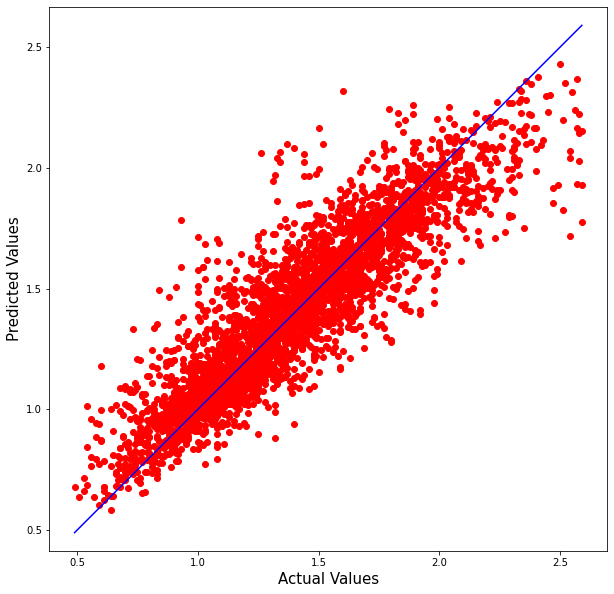

In [135]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, pred_knn_bm, c='red')
plt.yscale('linear')
plt.xscale('linear')

p1 = max(max(pred_knn_bm), max(y_test))
p2 = min(min(pred_knn_bm), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)
plt.axis('equal')
plt.show()

Upon review, found Predicted Value is 80.51% equivalent to Actual Values